In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from pathlib import Path
from scipy.stats import ttest_rel

sleep_results_path = Path("resources/Sleep_efficiency.csv")
sleep_df = pd.read_csv(sleep_results_path)
sleep_df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


# Data Cleaning
- make data usable 
- gather columns I need

In [2]:
sleep_df.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

In [3]:
desired_columns = ['ID','Age','Gender','Sleep duration','Sleep efficiency', 'Awakenings','Caffeine consumption','Alcohol consumption','Smoking status', 'Exercise frequency']
desired_df = sleep_df.loc[:,desired_columns]
cleaned_df = desired_df.dropna()
cleaned_df.head()
cleaned_df.reset_index
cleaned_df


,ID,Age,Gender,Sleep duration,Sleep efficiency,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,6.0,0.88,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,7.0,0.66,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,8.0,0.89,1.0,0.0,0.0,No,3.0
3,4,40,Female,6.0,0.51,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,8.0,0.76,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...
445,446,30,Female,7.5,0.53,4.0,50.0,2.0,Yes,1.0
447,448,27,Female,7.5,0.91,0.0,0.0,0.0,No,5.0
448,449,52,Male,6.0,0.74,4.0,25.0,0.0,No,3.0
450,451,45,Male,7.0,0.76,3.0,0.0,0.0,No,3.0


# Alcohol vs Sleep Efficiency, Sleep duration, Awakenings
- Show a dataframe which displays the averages according to how much the person drank
- show comparisons of the amount drank and it's impact with visualizations 
- run a t-test on the data

In [4]:
alc_grouped_df = cleaned_df.groupby(["Alcohol consumption"])
alc_s_e = alc_grouped_df["Sleep efficiency"].mean()
alc_s_duration = alc_grouped_df["Sleep duration"].mean()
alc_s_a = alc_grouped_df["Awakenings"].mean()
alc_df = pd.DataFrame({
    "Sleep efficiency rating(0-1)" : alc_s_e,
    "Sleep duration": alc_s_duration,
    "Awakenings" : alc_s_a
})
alc_df

,Sleep efficiency rating(0-1),Sleep duration,Awakenings
Alcohol consumption,,,
0.0,0.832398,7.441176,1.402715
1.0,0.803404,7.542553,1.531915
2.0,0.669143,7.514286,1.971429
3.0,0.761282,7.641026,2.000000
4.0,0.688421,7.394737,2.157895
5.0,0.678519,7.055556,2.148148


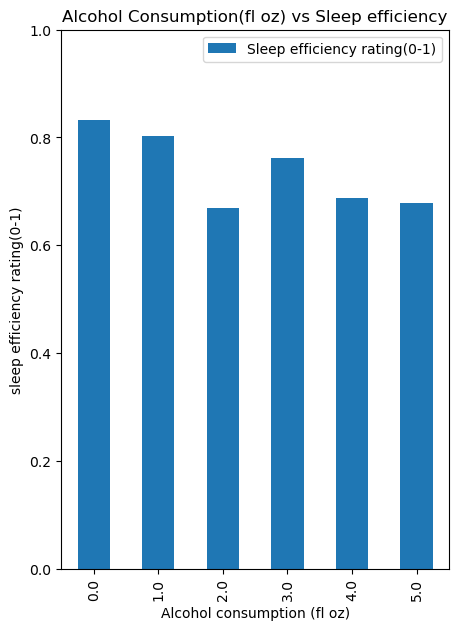

In [5]:
efficiency_alc = alc_df["Sleep efficiency rating(0-1)"]
efficiency_alc.plot(kind = "bar",legend = True, ylim = (0,1), xlabel = "Alcohol consumption (fl oz)", ylabel = "sleep efficiency rating(0-1)", figsize = (5,7), title = "Alcohol Consumption(fl oz) vs Sleep efficiency")
plt.show()

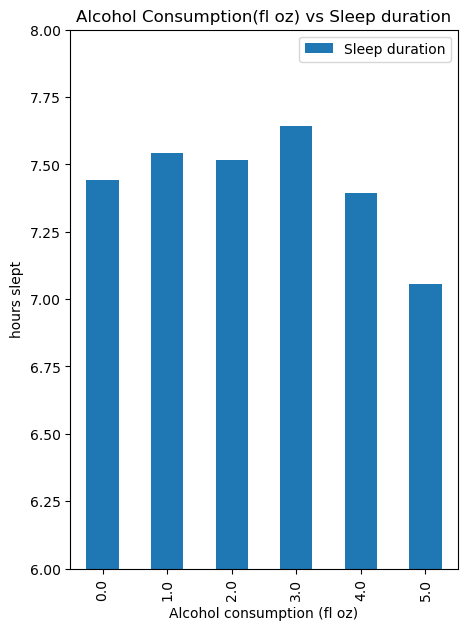

In [6]:
duration_alc = alc_df["Sleep duration"]
duration_alc.plot(kind = "bar",legend = True, ylim = (6,8), xlabel = "Alcohol consumption (fl oz)",ylabel = "hours slept", figsize = (5,7),title = "Alcohol Consumption(fl oz) vs Sleep duration")
plt.show()

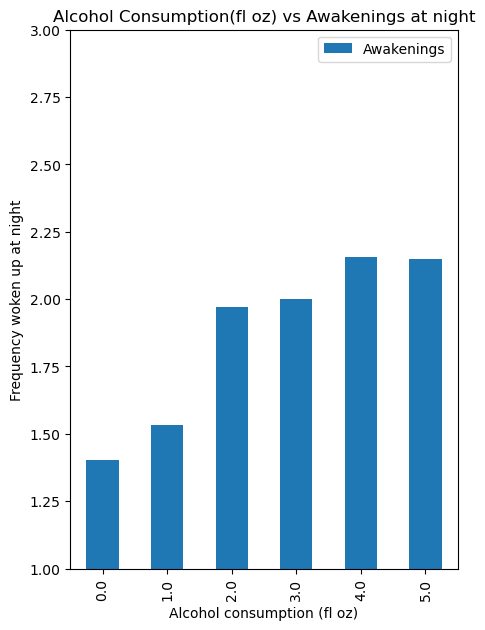

In [7]:
awakening_alc = alc_df["Awakenings"]
awakening_alc.plot(kind = "bar",legend = True, ylim = (1,3),xlabel = "Alcohol consumption (fl oz)", ylabel = "Frequency woken up at night", figsize = (5,7),title = "Alcohol Consumption(fl oz) vs Awakenings at night")
plt.show()

In [8]:
##sleep duration- alc and no alc populations

alc_list_dur = cleaned_df.loc[cleaned_df["Alcohol consumption"] > 0, "Sleep duration"]
no_alc_list_dur = cleaned_df.loc[cleaned_df["Alcohol consumption"] == 0, "Sleep duration"]

##number of awakening- alc and no alc populations

alc_list_awakening = cleaned_df.loc[cleaned_df["Alcohol consumption"] > 0, "Awakenings"]
no_alc_list_awakening = cleaned_df.loc[cleaned_df["Alcohol consumption"] == 0, "Awakenings"]

##sleep efficiency - alc and no alc populations

alc_list_eff = cleaned_df.loc[cleaned_df["Alcohol consumption"] > 0, "Sleep efficiency"]
no_alc_list_eff = cleaned_df.loc[cleaned_df["Alcohol consumption"] == 0, "Sleep efficiency"]

In [9]:
#alcohol vs no alcohol sleep duration
stats.ttest_ind(alc_list_dur, no_alc_list_dur, equal_var=False)

Ttest_indResult(statistic=0.2527045451173407, pvalue=0.8006411818087709)

In [10]:
#alc vs no alc awakenings
stats.ttest_ind(alc_list_awakening, no_alc_list_awakening, equal_var=False)

Ttest_indResult(statistic=3.6482320298522235, pvalue=0.000304045589411259)

In [11]:
#alcohol vs no alcohol efficiency
stats.ttest_ind(alc_list_eff, no_alc_list_eff, equal_var=False)

Ttest_indResult(statistic=-7.4564621910938245, pvalue=9.52328570995898e-13)

## Caffeine vs Sleep Efficiency, Sleep duration, Awakenings
- Show a dataframe which displays the averages according to caffeine intake
- show comparisons of the caffeine intake and it's impact with visualizations
- run a t-test on the data

In [12]:
caf_grouped_df = cleaned_df.groupby(["Caffeine consumption"])
caf_s_e = caf_grouped_df["Sleep efficiency"].mean()
caf_s_duration = caf_grouped_df["Sleep duration"].mean()
caf_s_a = caf_grouped_df["Awakenings"].mean()
caf_df = pd.DataFrame({
    "Sleep efficiency rating(0-1)" : caf_s_e,
    "Sleep duration": caf_s_duration,
    "Awakenings" : caf_s_a
})
caf_df

,Sleep efficiency rating(0-1),Sleep duration,Awakenings
Caffeine consumption,,,
0.0,0.785692,7.423077,1.723077
25.0,0.798493,7.643836,1.602740
50.0,0.771649,7.432990,1.556701
75.0,0.855789,7.131579,1.157895
100.0,0.900000,7.000000,0.000000
200.0,0.906667,7.333333,0.666667


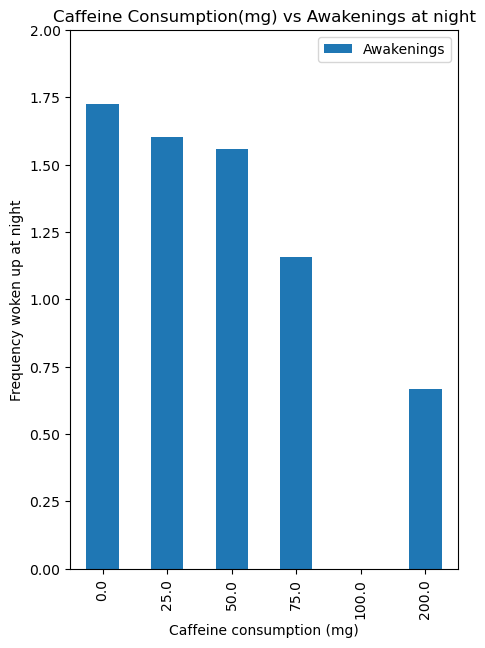

In [13]:
awakening_caf = caf_df["Awakenings"]
awakening_caf.plot(kind = "bar",legend = True, ylim = (0,2),xlabel = "Caffeine consumption (mg)", ylabel = "Frequency woken up at night", figsize = (5,7),title = "Caffeine Consumption(mg) vs Awakenings at night")
plt.show()

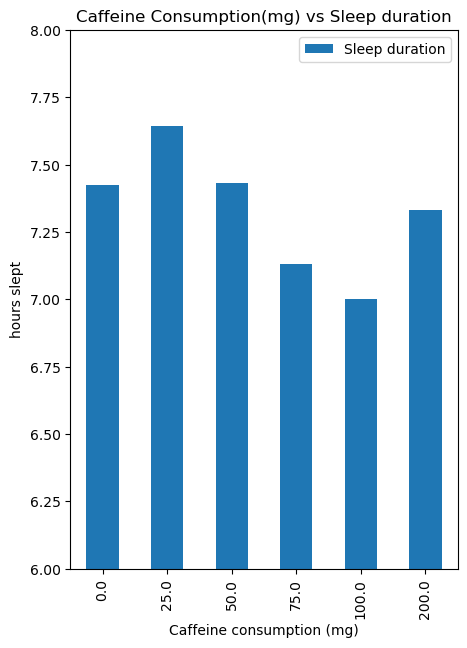

In [14]:
duration_caf = caf_df["Sleep duration"]
duration_caf.plot(kind = "bar",legend = True, ylim = (6,8), xlabel = "Caffeine consumption (mg)",ylabel = "hours slept", figsize = (5,7),title = "Caffeine Consumption(mg) vs Sleep duration")
plt.show()

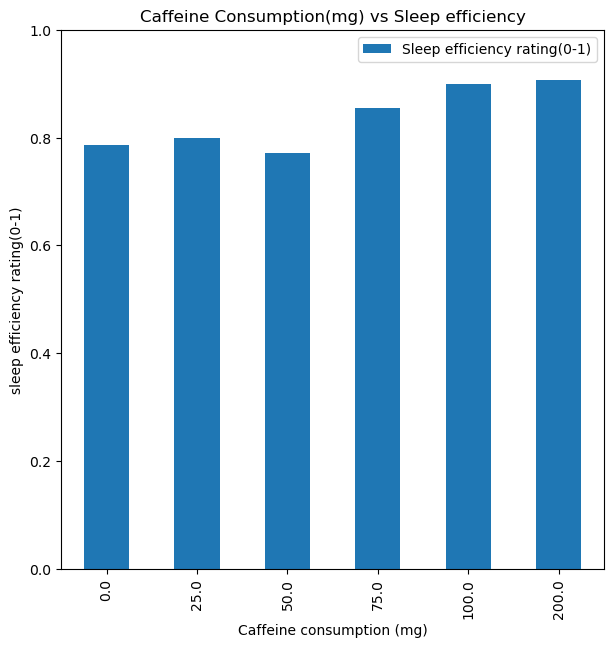

In [15]:
efficiency_caf = caf_df["Sleep efficiency rating(0-1)"]
efficiency_caf.plot(kind = "bar",legend = True, ylim = (0,1), xlabel = "Caffeine consumption (mg)",ylabel = "sleep efficiency rating(0-1)", figsize = (7,7), title = "Caffeine Consumption(mg) vs Sleep efficiency")
plt.show()

In [16]:
cleaned_df.head()

,ID,Age,Gender,Sleep duration,Sleep efficiency,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,6.0,0.88,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,7.0,0.66,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,8.0,0.89,1.0,0.0,0.0,No,3.0
3,4,40,Female,6.0,0.51,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,8.0,0.76,3.0,0.0,3.0,No,3.0


In [17]:
##number of awakening- caf and no caf populations

caf_list_awakening = cleaned_df.loc[cleaned_df["Caffeine consumption"] > 0, "Awakenings"]
no_caf_list_awakening = cleaned_df.loc[cleaned_df["Caffeine consumption"] == 0, "Awakenings"]

##sleep efficiency - caf and no caf populations

caf_list_eff = cleaned_df.loc[cleaned_df["Caffeine consumption"] > 0, "Sleep efficiency"]
no_caf_list_eff = cleaned_df.loc[cleaned_df["Caffeine consumption"] == 0, "Sleep efficiency"]

##sleep duration - caf and no caf populations

caf_list_dur = cleaned_df.loc[cleaned_df["Caffeine consumption"] > 0, "Sleep duration"]
no_caf_list_dur = cleaned_df.loc[cleaned_df["Caffeine consumption"] == 0, "Sleep duration"]

In [18]:
# caffeine vs no caffeine awakenings per night
stats.ttest_ind(caf_list_awakening, no_caf_list_awakening, equal_var=False)

Ttest_indResult(statistic=-1.528949761702849, pvalue=0.12709595959419737)

In [19]:
#caffeine vs no caffeince sleep efficiency
stats.ttest_ind(caf_list_eff, no_caf_list_eff, equal_var=False)

Ttest_indResult(statistic=0.5190221484342665, pvalue=0.6040428123156312)

In [20]:
#caffeine vs no caffeine sleep duration
stats.ttest_ind(caf_list_dur, no_caf_list_dur, equal_var=False)

Ttest_indResult(statistic=0.6257354168751873, pvalue=0.5318609818095535)

## Linear regresssion models 

In [21]:
substances = ["Alcohol consumption","Caffeine consumption"]
effects = ["Sleep efficiency", "Awakenings","Sleep duration"]

def lin_reg(substance, effect):
        x_values = cleaned_df[substance]
        y_values = cleaned_df[effect]

        (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,3)) + "x +" + str(round(intercept,2))

        x = cleaned_df[substance].mean()
        y = cleaned_df[effect].mean()
        
        plt.scatter(x_values,y_values,alpha = .65)
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(line_eq,(x,y),fontsize=15,color="red")
               
        
        plt.xlabel(substance)
        plt.ylabel(effect)
        plt.title(substance + " vs " + effect)
        plt.show
        
        print(f"The r-value is: {rvalue**2}")

The r-value is: 0.044107246464858724


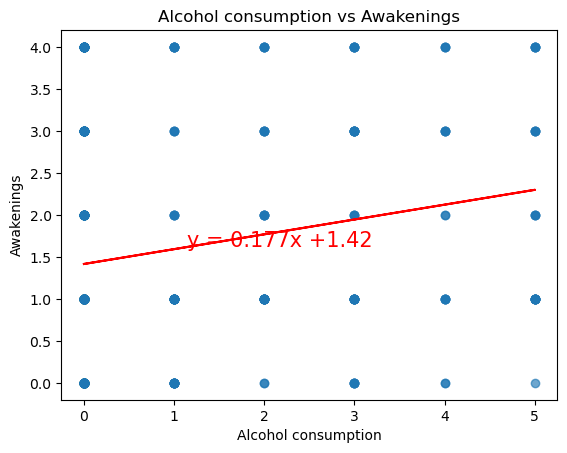

In [22]:
lin_reg("Alcohol consumption", "Awakenings")

The r-value is: 0.0023460230475349513


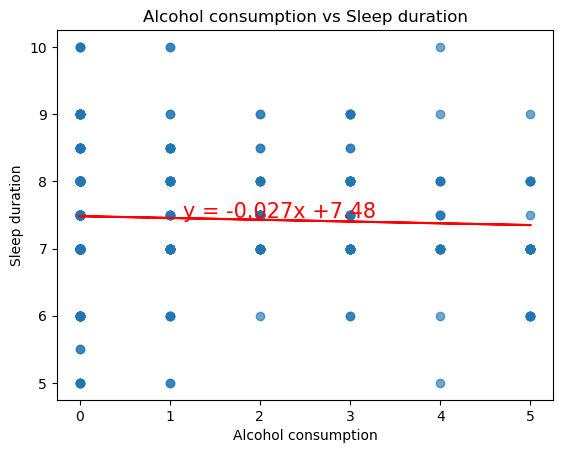

In [23]:
lin_reg("Alcohol consumption", "Sleep duration")

The r-value is: 0.1576182133049079


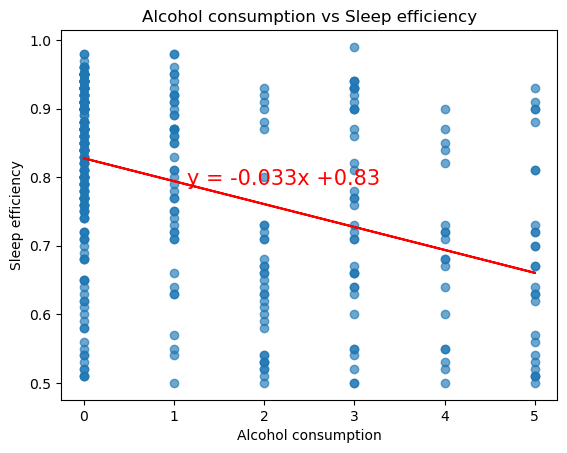

In [24]:
lin_reg("Alcohol consumption", "Sleep efficiency")

The r-value is: 0.012751467812390829


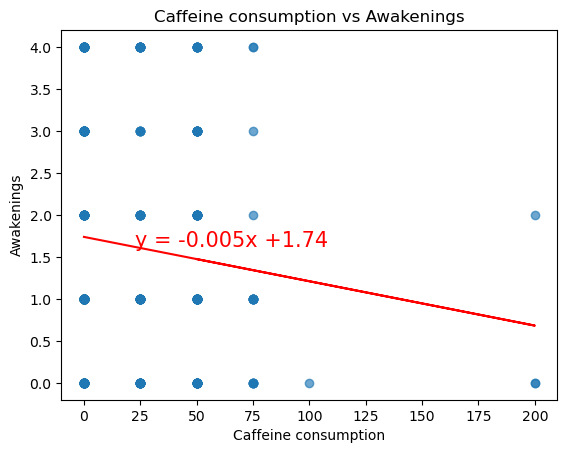

In [25]:
lin_reg("Caffeine consumption", "Awakenings")

The r-value is: 0.0009561463675420601


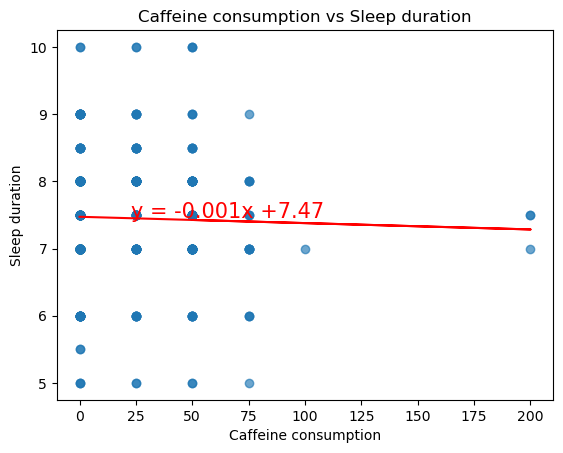

In [26]:
lin_reg("Caffeine consumption", "Sleep duration")

The r-value is: 0.005013161872617675


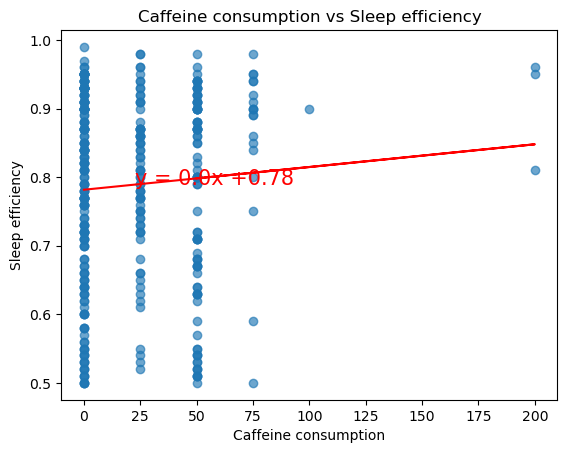

In [27]:
lin_reg("Caffeine consumption", "Sleep efficiency")